# Doğrusal Olmayan Regresyon Modelleri

# KNN Model

In [0]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [88]:
knn_model 
# model hiper parametresi :komşuluk sayısıdır.(n_neighbors)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [89]:
knn_model.n_neighbors

5

## Tahmin

In [90]:
y_pred = knn_model.predict(X_test) # test seti tahminleri
y_pred

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [91]:
np.sqrt(mean_squared_error(y_test,y_pred)) # test hatası

426.6570764525201

In [92]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

# 1 den 10 a kadar değişen k komşuluk sayısı değerleri için rmse eğitim atalarının aldığı değerler.

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.64671325413764
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [0]:
from sklearn.model_selection import GridSearchCV # bu fonksiyon olası tüm hiper parametreleri dener.

In [0]:
knn_params = {'n_neighbors': np.arange(1,30,1)}
# sözlük yapısında yazdığımız ismin algoritma  için geçen hiper parametre adıyla birebir aynı  olmalı.
# 1 ile 30 arasında 1 er 1 er tüm parametreleri deneyeceğiz. 

In [0]:
knn =KNeighborsRegressor() # model nesnesi

In [0]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) # cv modeli oluşturduk


In [97]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [99]:
knn_cv_model.best_params_['n_neighbors']

8

In [0]:
# en uygun parametre bulundu.

In [101]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

    # valide  edilmiş ve edilmemiş hata skorlarının karşılaşttırılması.

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.39475147063825
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.64671325413764 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [0]:
knn_tuned = KNeighborsRegressor(n_neighbors = 8)

In [103]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [104]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# Destek Vektör Regresyonu(SVR)

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"]) 
# bağımısz değişken olarak tek bir değişken üzerinden inceleyip basit doğrusal regresyon ile karşılaştıracağız.
# bu yüzden bir tek hits değişkenini bağımsız değişken atadım.

In [0]:
from sklearn.svm import SVR

In [0]:
svr_model = SVR("linear").fit(X_train,y_train)

In [109]:
svr_pred = svr_model.predict(X_train  )
svr_pred[0:5] # y tahminleri

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [110]:
# model denklemi
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [111]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [112]:
-48.7 + 4.96*91 # görüldüğü üzere verilen kat sayıları ve değişkeni yerlerine yerlerşyirrdiğimde y tahmini elde ettik.

402.66

In [113]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [114]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

### svr'ın önemli özelliklerinden biri normal regresyon modellerine göre aykırı gözlemlere daha dayanıklıdır.

## Tahmin

In [115]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [116]:
svr_model.predict([[91]])

array([403.52804878])

In [0]:
y_pred = svr_model.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [119]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Model Tuning

In [120]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# tune etmemiz gereken değer  C karmaşıklılık parametresi

In [0]:
svr_params = {"C": np.arange(0.1,2,0.1)}

svr_cv_model = GridSearchCV(svr_model, svr_params,cv = 10).fit(X_train, y_train)
# svr_model üzerinde  svr parametrelerini 10 katmanlı cv işlemi yap


In [123]:
svr_cv_model.best_params_
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [0]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)



In [0]:
y_pred = svr_tuned.predict(X_test) # y test tahmini

In [126]:
np.sqrt(mean_squared_error(y_test,y_pred)) # y test hatası

458.198966781116

In [0]:
# karmaşıklılık parametresi C yi bulduktan sonra onu tüm değişkenleri kullanarak kullanabilrdik.

# Doğrusal olmayan SVR

In [0]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

# Doğrusal olmayan suni bir veri seti oluşturduk. İçinde aykırı gözlemlerde var.

In [0]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

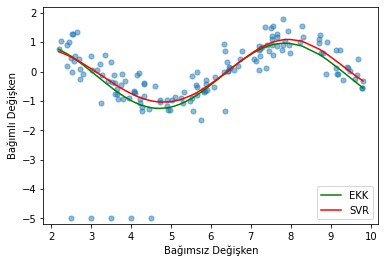

In [130]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

# Görüldüğü üzere EKK aykırı gözlemler yüzünden daha aşağıda. SVR ise aykırılardan etkilenmemiş.

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
svr_rbf = SVR("rbf").fit(X_train, y_train) # modeli kurduk.

## Tahmin

In [133]:
svr_rbf.predict(X_test) # test tahmini

array([467.17641555, 446.40313543, 478.61634896, 407.90736132,
       478.21333994, 417.12254646, 409.5369652 , 406.6833667 ,
       475.87387807, 472.35514043, 437.62371823, 470.87017269,
       475.61088446, 409.98015887, 417.76687494, 478.43331711,
       433.90433249, 405.3784308 , 449.34132456, 417.20961012,
       467.52126683, 429.7970886 , 429.27433039, 425.64037296,
       419.74184952, 403.04020294, 478.12867963, 419.46502593,
       467.98640388, 405.00840939, 404.35642525, 402.66487856,
       443.78645366, 412.97944034, 411.32083923, 478.8961275 ,
       471.79125748, 410.33130924, 403.32692238, 426.9544654 ,
       403.64557418, 404.74733617, 454.74782229, 433.10191289,
       478.70972915, 459.9497864 , 477.55417184, 405.01026337,
       408.92637939, 426.28903835, 472.7745124 , 446.66776352,
       441.59170843, 412.58392272, 406.04166734, 438.41225906,
       451.95520339, 476.94220443, 407.53571839, 475.58095683,
       472.51311483, 420.0614604 , 453.93699692, 421.10

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred)) # test hatası

458.198966781116

## Model Tuning 

In [135]:
svr_rbf # karmaşıklılık parametresi(ceza param.) C bizim optimize etmemiz gereken parameredir.

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
svr_params = {"C": [0,1,0.4,5,10,20,30,40,50]}

In [137]:
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv=10) # svr_rbf in svr_paramslarını 10 katmanlı olarrak dene
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
pd.Series(svr_cv_model.best_params_)[0] # optimum parametreyi bulduk. pandas series e çevirmemiz lazım.

50

In [0]:
svr_tuned = SVR("rbf",C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

# tune edilmiş modeli oluşturduk.

In [140]:
y_pred = svr_cv_model.predict(X_test) # tahmin


np.sqrt(mean_squared_error(y_test, y_pred)) # test hatası

428.00406888095694


 # Çok Katmanlı Algılayıcılar-Yapay Sinir Ağları (YSA)

In [0]:

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler 
# veriye bir dönüştürme işlemi yapmalıyız. Normalde her algoritma bunu sever ama ysa için ekstra dikkat etmeliyiz.

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train_scaled = scaler.transform(X_train)

In [0]:
X_test_scaled = scaler.transform(X_test)

In [0]:
# X train ve testi dönüştürdük.

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train, y_train) 
# hidden_layer_size argümanıyla katmandaki nöron sayısını verdik
# 20 yi de ekleyince 20 nöronnlu bir gizli katman daha açtı.

In [149]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [150]:
mlp_model.n_layers_ # katman sayısına ulaştık n olmasının sebebi 1 girdi katmanı n-2 gizli katman 1çıktı katmanı

4

In [151]:
mlp_model.hidden_layer_sizes # bu ise gizli katmanların içindeki elemanların yani nöronların sayısını verir.

(100, 20)

## Tahmin

In [152]:
mlp_model.predict(X_train_scaled)[0:5]

array([-0.00368072,  0.99506985,  0.79673274, -0.72092644,  0.45695853])

In [0]:
y_pred = mlp_model.predict(X_test_scaled)

In [154]:
np.sqrt(mean_squared_error(y_test, y_pred))

692.2843953859353

## Model Tuning

In [155]:
mlp_model 

# Burada tune edilmesi gereken parametre gizli katmann sayısıdır.
# katman sayısını her bir katmanın nöron sayısını belirterek gösterebiliyoruz.

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.005],
              'hidden_layer_sizes':[(20,20),(100,50,150),(300,200,150)],
              'activation': ['relu', 'logistic']}

In [0]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params, cv=10)

In [82]:
mlp_cv_model.fit(X_train_scaled, y_train)
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [0]:
mlp_tuned = MLPRegressor(alpha = 0.02,hidden_layer_sizes = (100,50,150))

In [158]:
mlp_tuned.fit(X_train_scaled,y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [0]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [160]:
np.sqrt(mean_squared_error(y_test,y_pred)) # Şu ana kadar ki en iyi test hatası.

359.4564096697495

# CART

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [0]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10) # max_leaf_nodes argümanıyla kırılım sayısıyla oynuyoruz.
# bu kırılımı optimize etmeliyiz ki en iyi sonuçları alalım.

In [164]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [165]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

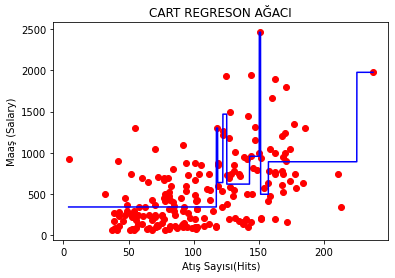

In [166]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [0]:
# modeli kurduk ama yetmez daha sonra başka sisteme entegre edilmek istendiği zaman bir kural seti ortaya koymuş olmak gerekir.
#pytona uyumlu öyle bir kural seti oluşturmalıyım ki değişken değerlerini girince bize thmini versin.

In [168]:
!pip install skompiler
#!pip install SKompiler[full]

from skompiler import skompile

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for skompiler: filename=SKompiler-0.5.5-cp36-none-any.whl size=57148 sha256=23ab5bc8e6761f266f70308b0cb5a074286d4ff1f66870c71f80847e72143e4c
  Stored in directory: /root/.cache/pip/wheels/21/eb/99/6e32f89da503a823f6bc1a985abfdaeaa01b3a6b5ac5776d15
Successfully built skompiler


In [169]:
print(skompile(cart_model.predict).to('python/code'))
# çıktıdaki kod python kodudur. ml algoritmasını python koda çevirdik. Böylece istediğimiz sisteme gömebiliriz.

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



## Tahmin

In [170]:
x=[91]

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [0]:
y_pred = cart_model.predict(X_test)

In [172]:
cart_model.predict([[91]])

array([345.20115517])

In [0]:
y_pred = cart_model.predict(X_test)

In [174]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

## Model Tuning

In [0]:
cart_model  =DecisionTreeRegressor() 
cart_model.fit(X_train,y_train)
y_pred =  cart_model.predict(X_test)

# min_samples_split argümanının 2 olması düz if else anlamına gelir daha da artırırsak bu şartlar uzar.optimize edilmelidir.

In [181]:
np.sqrt(mean_squared_error(y_test,y_pred))

468.49579052913884

In [0]:
cart_params = {"min_sample_split": range(2,100),
          "max_leaf_nodes": range(2,10)}

In [0]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [184]:
cart_cv_model.fit(X_train, y_train) # hata olmaması gerekiyor anlammadım.

ValueError: ignored

In [0]:
cart_cv_model.best_params_

In [0]:
cart_tuned= DecisionTreeRegressor(max_leaf_nodes= 9, min_samples_split=76)

In [0]:
cart_tuned.fit(X_train, y_train)

In [0]:
y_pred = cart_tuned.predict(X_test)

In [0]:
np.sqrt(mean_squared_error(y_test, y_pred)) # bunnu tüm değişkenler üzerinden yaparsam daha da  düşecektir.

# Bagged Trees Regresyon

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [187]:
bag_model = BaggingRegressor(bootstrap_features=True) 
# bootsrap örneklemlerini gözlemlemek için true yaptım. öntanımı değeri false.

bag_model.fit(X_train, y_train)
# n_estimators oluşturulacak ağaç sayısı.

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [188]:
bag_model.n_estimators # ağaç sayısı

10

In [189]:
bag_model.estimators_
# tüm ağaçları tek tek görüyoruz.

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=487534025, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=249591266, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decr

In [190]:
bag_model.estimators_samples_ # her bir ağaçtaki örnekler

[array([153,  32,  71,  90,  23,  51,  83, 178, 105, 122, 190,  55,  55,
          1,  48, 135, 125,  53, 143,  12, 186,  66, 142,  28, 178, 186,
         22, 192, 126, 133,  20,  32, 183,   6,   2,  37, 107,  35,  66,
         26, 192, 138, 141,  18,   3,  14,  77,   0,  24, 173,   6,  13,
          7, 184, 100, 132, 187,  39, 147,  65,  67,  89, 169,  93,  62,
        194,  12,  37, 106, 172,   0, 194,  90,  81,  43, 129,  60,  31,
         16,  24,   5,  33,  70,  79, 124,  20,  61, 106, 184,  51,  41,
          2, 105,  10,  63, 117,   1,  83,  52, 188,  14, 179,  36,  92,
         48, 167,   4,  19, 146, 180,  52, 126, 168, 195,  20, 146,  34,
        190, 181,  29,  97, 150, 192, 128, 151, 115, 101,  39,  19, 120,
        147, 107, 188, 139,  51, 101,  96, 178,  25,  47,  24, 157, 188,
        167,  99, 141,   9,  80,  65, 138,   1,  47, 128, 138,  88,  21,
        188,  88, 141,  28, 151,  12, 146,   3,  88, 151,  45,  95, 150,
         66, 192, 180,  30,  94,  55,  38,  47, 122

In [191]:
bag_model.estimators_features_ # her bir ağacın kullandığı değişkenler

[array([16, 12, 10,  5, 13,  2,  4, 11, 15, 13, 13, 18, 13, 15,  7,  6,  1,
         4, 15]),
 array([ 7,  7,  5, 17,  7, 17,  9,  2,  7,  2,  3,  5,  4, 11,  0,  3, 16,
        10,  0]),
 array([14,  1, 14, 13,  3, 14, 15,  0,  1, 14,  9,  6,  5, 15, 16, 13,  2,
        18,  7]),
 array([ 6,  6,  5, 11, 16, 10,  5, 10, 17,  5, 14, 12,  6,  1,  9,  2, 13,
         8,  9]),
 array([ 1, 12,  9, 18,  5, 11,  8, 17,  7,  3, 15,  3, 14, 10,  3, 13, 14,
        12,  7]),
 array([18, 12,  5,  0,  1, 13, 16, 14,  1,  4,  1,  8, 12, 14, 12,  2, 13,
         2,  2]),
 array([ 8,  8, 17, 10, 16,  5, 10,  9, 18, 17,  6, 12, 11, 12,  0,  7, 12,
         1, 12]),
 array([11,  0,  5, 10,  1,  0,  6, 12, 13,  8,  0, 10,  7,  7,  4,  2, 16,
         4,  4]),
 array([ 6,  1, 12,  6,  8,  8, 10,  0,  0, 12, 12,  0,  6, 14,  9,  9, 14,
        14,  6]),
 array([11,  0,  1, 11, 13,  6, 15, 14,  7,  1, 11,  0, 14,  4,  6, 16,  2,
         6,  6])]

In [192]:
bag_model.estimators_[0] # sadece ilk modelin özelliklerine eriştim..

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=487534025, splitter='best')

## Tahmin

In [0]:
y_pred = bag_model.predict(X_test)

In [194]:
np.sqrt(mean_squared_error(y_test, y_pred))

336.1185873730568

In [0]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [196]:
np.sqrt(mean_squared_error(y_test,iki_y_pred)) # 1. ağacın hatası

470.3000660342965

# Model Tuning

In [197]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [0]:
bag_params = {"n_estimators": range(2,20)} # ağaç sayısını optimize edeceğiz.

In [0]:
bag_cv_model = GridSearchCV(bag_model, bag_params,cv=10)

In [200]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(2, 20)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [201]:
bag_cv_model.best_params_

{'n_estimators': 11}

In [0]:
bag_tuned = BaggingRegressor(n_estimators=19, random_state = 45).fit(X_train, y_train)

In [0]:
yedi_y_pred = bag_tuned.predict(X_test)

In [204]:
np.sqrt(mean_squared_error(y_test,yedi_y_pred))

332.4260086061929

# Random Forests

In [0]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf_model = RandomForestRegressor(random_state=42)

In [208]:
rf_model.fit(X_train, y_train)
# max_feaature bölünme işlemlerinde göz önünde olacak maksimum değişken sayısını ifade ediyor.
# n_estimators tahminci ağaç sayısı.
# max_depth parametresi ağaçların derinlik sayısıdır.
# min_samples_split bir node bölünmeden önce bu node daki minumum gözlemm sayısını ifade eder.
# min_samples_leaf leaf node daki minumum gözlem sayısı

# aslında en önemlii olanlar n_estimtors ağaç sayısı ve max_features yani her bölünmede göze alınacak olan gözlem sayısı.
# 3. olarak da max_depth yani derinlik yani dallanma kontrolüyle alakalı önemli bir parametredir.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Tahmin

In [0]:
y_pred = rf_model.predict(X_test)

In [210]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.73852779396566

## Model Tuning

In [0]:
rf_params = {"max_depth":list(range(1,10)),
            "n_estimators": [100,200,500,1000,2000] , # makalelerden ulaşabileceğimiz üzere genellikle 500 ve 1000 tercih edilir. İyi çalıştığı düşünülür.
             "max_features": [2,3,5,10,15]}

In [0]:
rf_model = RandomForestRegressor(random_state=42)

In [0]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)


# Denenecek ağaç sayısı, oluşan kombinasyonlar ve yapılacak cv işlemi düşünüldüğünde bu işlem çok uzun sürer. Bu yüzden paralel işlem gücü ile 
# işlemci performansını arttırmak için n_jobs argümanını - 1 yaptık.

In [0]:
rf_cv_model.fit(X_train, y_train) # uzun sürdüğü için çalıştırmadım

In [0]:
rf_cv_model.best_params_

In [0]:
rf_tuned = RandomForestRegressor(max_depth=6,max_features=2, n_estimators=100 ).fit(X_train, y_train)

In [0]:
rf_tuned

In [0]:
y_pred = rf_tuned.predict(X_test)

In [0]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [0]:
# değişkenlerin öneemlerini karşılaştırmak geerekebilir.

In [0]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

In [0]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")



In [0]:
v